In [18]:
"""
DO NOT RUN

'Data Observation' was used to test data and help visual data to determine best ways to display/interpret the data.
"""
#THINGS TO DO:
# MAKE A GRAPH FROM BOROUGHZIPLIST TO SHOW THE NNUMBER OF ZIP CODES IN EACH BOROUGH

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import math   
import seaborn as sns

In [189]:
#Getting "number of missing data" from each neighborhood
medianRentSE = pd.read_csv('data/medianAskingRentStreetEasy.csv')
#Dropping cols/rows irrelevant to missing data count
dropCols = medianRentSE.columns[0:63]
medianRentSE.drop(dropCols, axis=1, inplace=True)
medianRentSE.drop([0,1,2,3,4], axis=0, inplace=True)
print(medianRentSE)
#Changes minor optimizations and file reading through pandas

     2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  \
5     2200.0   2200.0   2200.0   2300.0   2300.0   2295.0   2300.0   2300.0   
6     1995.0      NaN   2300.0   2100.0   1995.0   1995.0   1950.0   1900.0   
7     1725.0   1775.0   1775.0   2000.0   1850.0   1613.0   1700.0   1700.0   
8     3800.0   3950.0   4025.0   4150.0   4518.0   4630.0   4700.0   4795.0   
9     1700.0   1700.0   1749.0   1800.0   1800.0   1800.0   1800.0   1850.0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
193   2700.0   2700.0   2637.0   2700.0   2700.0   2800.0   2800.0   2605.0   
194   1700.0   1700.0   1700.0   1675.0   1735.0   1725.0      NaN      NaN   
195      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
196   1925.0   2150.0   1900.0   1838.0   1800.0   1913.0   1800.0   1800.0   
197      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2015-09  2015-10  ...  2022-07  2022-08  2022-

In [197]:
#Create a list containing the number of missing datapoints in each row
first = True
fail_list = []
for line in medianRentSE.values:
    failcount = 0
    if first:
        DATA_LEN = len(line)
        first = False
    for point in line:
        if math.isnan(point):
            failcount += 1
    if failcount > (DATA_LEN // 2) or failcount == 0: #Ignores lines that are missing no data or over half the data
        continue
    fail_list.append(failcount)
#CHANGES: Major condensing of code, removing extraneous code

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

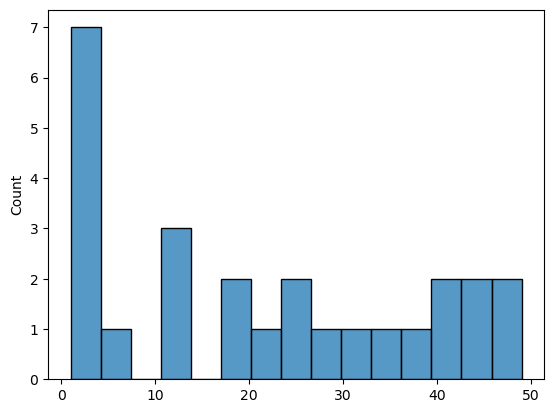

In [199]:
#Draws graph of remaining missing data count
sns.histplot(data=fail_list, bins=bin_count)
#CHANGES: graphing done with seaborn

In [ ]:
#Reads income/rent data to a dictionary and separates points with positive or negative rent difference
tDataDict = {}
nBelow = []
nAbove = []
with open('NYCIncomeRentData.csv') as totalData:
    tData = csv.reader(totalData, delimiter=',')
    first = True
    for line in tData:
        neighbor = line[0]
        tDataDict[neighbor] = line[1:]
        if first:
            first = False
            continue
        if float(line[-1]) > 0:
            nAbove.append(line[-1])
        else:
            nBelow.append(line[-1]) 

In [ ]:
#Determining and printing the mean and median amounts by which the rents exceeded the 30% income threshold
count = 0
meanAbove = 0
nAbove.sort()
nBelow.sort(reverse=True)
medianAbove, meanAbove = MedianMeanCalc(nAbove)
medianBelow, meanBelow = MedianMeanCalc(nBelow)
print('Mean above 30: %s\nMedian above 30: %s' %(meanAbove, medianAbove))
print('Mean below 30: %s\nMedian below 30: %s' %(meanBelow, medianBelow)) 

In [ ]:
#Getting the percentage of actual rent being paid in respect to income
RentPercent = []
for key in tDataDict:
    keyList = tDataDict[key]
    if keyList[0] == 'Median Income' or keyList[-1] == 'Actual Rent vs. 30% Income Rent':
        continue
    Inc, Rent = float(keyList[0]), float(keyList[4])
    RentPercent.append((Rent / (Inc/12)) * 100)
RentPercentS = RentPercent.copy()
RentPercentS.sort()
medARent, meanARent = MedianMeanCalc(RentPercentS)
print(medARent)

In [ ]:
#Plotting income along x, and rent costs for y
mIncome = []
rDiff = []
incomeList = []
for key in tDataDict:
    keyList = tDataDict[key]
    if keyList[0] == 'Median Income' or keyList[-1] == 'Actual Rent vs. 30% Income Rent':
        continue
    mIncome.append(keyList[0])
    rDiff.append(keyList[-1])
mIncome.sort()
IncomeData = plt.figure()
for i in range(len(mIncome)):
    mIncome[i] = float(mIncome[i])
for i in range(len(rDiff)):
    rDiff[i] = float(rDiff[i])
incomeList = mIncome[:]
mIncome = np.array(mIncome)
RentPercent = np.array(RentPercent)
a, b = np.polyfit(mIncome,RentPercent, 1)
plt.scatter(mIncome, RentPercent)
plt.plot(mIncome, (a*RentPercent + b))
plt.plot(mIncome, (0*RentPercent + 30))
plt.xlabel('Median Income')
plt.ylabel('Actual Rent Percent')
plt.title('Median Income vs. Actual Rent Percent')
plt.show()

In [ ]:
#Calculating a middle class and the percentage rent takes up for the upper and lower bounds of the middle class
first = True
totalMedian, totalMean = MedianMeanCalc(incomeList)
midclassL = totalMedian * (2/3)
midclassH = totalMedian * 2
print("Upper Bound of Middle Class: " + str(midclassH))
print("Lower Bound of Middle Class: " + str(midclassL))
for key in tDataDict:
    keyList = tDataDict[key]
    if first:
        keyList.append("Middle Class Lower \%")
        keyList.append("Middle Class Higher \%")
        first = False
        continue
    keyList.append(float(keyList[4]) / (midclassL/12))
    keyList.append(float(keyList[4]) / (midclassH/12))

In [ ]:
#Calculating percentiles and rent %s for those percentiles then plotting them in a scatter plot
first = True
rentPer = []
percentiles = []
for key in tDataDict:
    if first:
        first = False
        continue
    rate = 0.0
    for i in range(10):
        rate += .2
        rentL = tDataDict[key][4]
        currPercent = totalMedian*rate
        rentPer.append(float(rentL)/currPercent)
        percentiles.append(rate)
rentPer = np.array(rentPer)
percentiles = np.array(percentiles)
uniques = []
for i in percentiles:
    if i not in uniques:
        uniques.append(i)
a, b = np.polyfit(percentiles,rentPer, 1)
print(a, b)
plt.scatter(percentiles, rentPer)
#plt.plot(percentiles, (a*rentPer + b))
plt.xlabel('Income Percentiles')
plt.ylabel('Rent Percent')
plt.title('Income Percentiles vs. Rent Percent')
plt.xticks(uniques)
plt.show()       

In [ ]:
#Checking and comparing mean/median vs income graphs to decide which is better to use
newMData = pd.read_csv('newMedianAskingRent.csv')
colAvg = []
beforeData = True
RentMedList = []
colNames = []
Tcount = -1 
first = True
for i in newMData.columns:
    if i == '2018-04':
        beforeData = False
    if beforeData:
        continue
    colNames.append(i)
    tempList = []
    for num in newMData[i]:
        tempList.append(num)
    RentMedList.append(MedianCalc(tempList))
for col in colNames:
    Tcount+=1
    colAvg.append(0)
    countAvg = 0
    for num in newMData[col]:
        if math.isnan(num):
            continue
        countAvg+=1
        colAvg[Tcount] += num
    colAvg[Tcount] = colAvg[Tcount] / countAvg
csvCovidDict = {'Year-Month': colNames, 'Average Rent': colAvg}
plt.scatter(csvCovidDict['Year-Month'], csvCovidDict['Average Rent'])#Decided on the mean vs income graph
plt.show()
plt.scatter(csvCovidDict['Year-Month'], RentMedList)
plt.show()